In [1]:
import numpy as np #lib para cálculos e funções em arrays multidimensionais
import pandas as pd #pandas - lib para manipulação e análise de dados de alta performance
import seaborn as sb #lib pra dar um upgrade na visualização do matplotlib
import matplotlib #lib para plotar gráficos
import matplotlib.pyplot as plt
sb.set_style('darkgrid') #definindo tema do seaborn (fundo mais escuro com grelhas)

font = {'family' : 'Arial', #definindo objeto para formatar a fonte
        'size'   : 16}

matplotlib.rc('font', **font) #aplicando a fonte padrão que queremos para o plot dos gráficos

## 1 - Carregando os Datasets pré-tratados ##

In [2]:
#Carregando o dataset de população por idade por raça
pop_norm = pd.read_csv('cor-idade-2010-tratada.csv', sep=',')

#Removendo a coluna de índice
pop_norm = pop_norm.iloc[: , 1:]

#Exibindo o dataset
print('\nTabela Pré-Tratada - População / Cor / Idade')
display(pop_norm)


Tabela Pré-Tratada - População / Cor / Idade


,Cor,0 a 4,5 a 9,10 a 14,15 a 19,20 a 24,25 a 29,30 a 34,35 a 39,40 a 44,45 a 49,50 a 54,55 a 59,60 a 64,65 a 69,70 a 74,75 e mais,Ignorada,Total
0,Branca,444168,433860,466843,462715,570950,636194,599762,524122,485640,465774,425601,358120,283006,208206,169901,128717,161089.0,6824668
1,Preta,29954,39476,52706,56272,68610,75869,73139,64755,59093,51910,47914,37809,27559,18537,13717,9097,9666.0,736083
2,Amarela,8329,9020,10726,12276,17282,21097,20445,18141,17467,17002,17422,17874,17175,13987,11468,7516,9017.0,246244
3,Parda,227650,275068,336289,309997,333423,339887,315436,280563,249819,207196,175970,133704,94896,61310,41992,25485,24533.0,3433218
4,Indígena,813,840,843,982,1352,1484,1256,1072,939,823,734,590,413,293,221,152,170.0,12977
5,Ignorado,13,15,23,15,42,52,38,31,21,15,17,16,6,5,2,2,0.0,313
6,Total,710927,758279,867430,842257,991659,1074583,1010076,888684,812979,742720,667658,548113,423055,302338,237301,170969,204475.0,11253503


## 2 - Tratamento dos dados - Terceiro ciclo ##

In [3]:
#Eliminando as 2 últimas linhas que não nos interessam mais
pop_norm = pop_norm[:-2] #ultima (total e ignorados)

print('\nPopulação / Cor / Idade')
display(pop_norm)


#df = df[:-1] #penultima


População / Cor / Idade


,Cor,0 a 4,5 a 9,10 a 14,15 a 19,20 a 24,25 a 29,30 a 34,35 a 39,40 a 44,45 a 49,50 a 54,55 a 59,60 a 64,65 a 69,70 a 74,75 e mais,Ignorada,Total
0,Branca,444168,433860,466843,462715,570950,636194,599762,524122,485640,465774,425601,358120,283006,208206,169901,128717,161089.0,6824668
1,Preta,29954,39476,52706,56272,68610,75869,73139,64755,59093,51910,47914,37809,27559,18537,13717,9097,9666.0,736083
2,Amarela,8329,9020,10726,12276,17282,21097,20445,18141,17467,17002,17422,17874,17175,13987,11468,7516,9017.0,246244
3,Parda,227650,275068,336289,309997,333423,339887,315436,280563,249819,207196,175970,133704,94896,61310,41992,25485,24533.0,3433218
4,Indígena,813,840,843,982,1352,1484,1256,1072,939,823,734,590,413,293,221,152,170.0,12977


In [4]:
#Eliminando a coluna referente aos que não responderam a idade
pop_norm = pop_norm.drop('Ignorada', axis=1)


print('\nPopulação / Cor / Idade')
display(pop_norm)


População / Cor / Idade


,Cor,0 a 4,5 a 9,10 a 14,15 a 19,20 a 24,25 a 29,30 a 34,35 a 39,40 a 44,45 a 49,50 a 54,55 a 59,60 a 64,65 a 69,70 a 74,75 e mais,Total
0,Branca,444168,433860,466843,462715,570950,636194,599762,524122,485640,465774,425601,358120,283006,208206,169901,128717,6824668
1,Preta,29954,39476,52706,56272,68610,75869,73139,64755,59093,51910,47914,37809,27559,18537,13717,9097,736083
2,Amarela,8329,9020,10726,12276,17282,21097,20445,18141,17467,17002,17422,17874,17175,13987,11468,7516,246244
3,Parda,227650,275068,336289,309997,333423,339887,315436,280563,249819,207196,175970,133704,94896,61310,41992,25485,3433218
4,Indígena,813,840,843,982,1352,1484,1256,1072,939,823,734,590,413,293,221,152,12977


## 3 - Transformações e Feature Engineering ##

In [5]:
#display(pop_norm)


# Transformando a coluna faixa etária em valores (linhas)
pop_melt = pop_norm.melt(id_vars=['Cor', 'Total'], value_vars=pop_norm.columns[1:-1], var_name='Faixa Etária', value_name="Habitantes")

#Transformando os campos Habitantes e Total em campos numéricos de fato
pop_melt.loc[:, 'Habitantes'] = pd.to_numeric(pop_melt['Habitantes'], errors='coerce')
pop_melt.loc[:, 'Total'] = pd.to_numeric(pop_melt['Total'], errors='coerce')

print('\nPopulação / Cor / Idade')
display(pop_melt)


População / Cor / Idade


,Cor,Total,Faixa Etária,Habitantes
0,Branca,6824668,0 a 4,444168
1,Preta,736083,0 a 4,29954
2,Amarela,246244,0 a 4,8329
3,Parda,3433218,0 a 4,227650
4,Indígena,12977,0 a 4,813
5,Branca,6824668,5 a 9,433860
6,Preta,736083,5 a 9,39476
7,Amarela,246244,5 a 9,9020
8,Parda,3433218,5 a 9,275068
9,Indígena,12977,5 a 9,840


In [6]:
#Adicionando nova coluna (Habitantes por Cor)
pop_melt['Habitantes por total cor'] = pop_melt['Habitantes'] / pop_melt.loc[:, 'Total']


print('\nPopulação / Cor / Idade')
display(pop_melt.head())


População / Cor / Idade


,Cor,Total,Faixa Etária,Habitantes,Habitantes por total cor
0,Branca,6824668,0 a 4,444168,0.065083
1,Preta,736083,0 a 4,29954,0.040694
2,Amarela,246244,0 a 4,8329,0.033824
3,Parda,3433218,0 a 4,227650,0.066308
4,Indígena,12977,0 a 4,813,0.062649


## 4 - Plotando o segundo gráfico para análise de faixa etária por etnia ##

(0, 0.14)

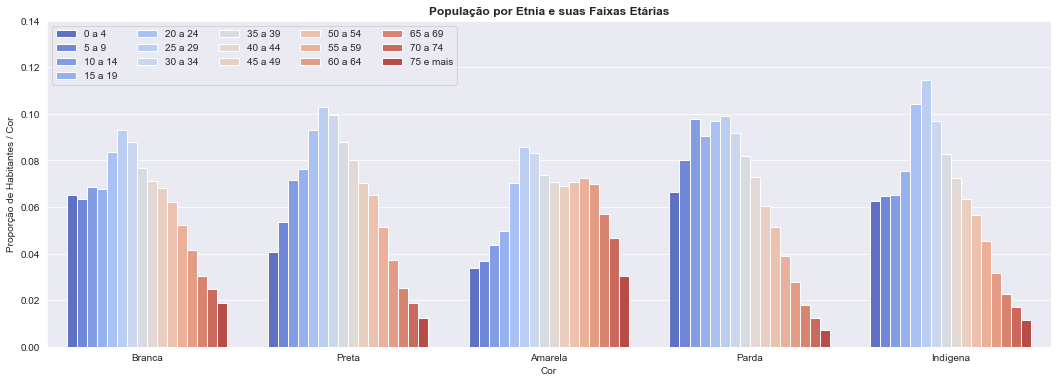

In [7]:
#Plotando o Gráfico de Faixa Etária / Cor

fig, axs = plt.subplots(figsize=(18, 6))
sb.barplot(data=pop_melt, hue='Faixa Etária', y='Habitantes por total cor', x='Cor', ax=axs, palette='coolwarm')
plt.legend(loc="upper left", ncol=len(pop_melt.columns))
plt.ylabel('Proporção de Habitantes / Cor')
plt.title('População por Etnia e suas Faixas Etárias',fontweight="bold")
plt.ylim(0, 0.14)



### Salvando os Resultados

In [8]:
pop_melt.to_csv("cor-idade-2010-proporcional.csv")